Saturated mutagenesis is a powerful tool both for dissecting a specific sequence of interest and understanding what the model learned. *basset_sat.py* enables this analysis from a test set of data.

To run this tutorial, you'll need to either download the pre-trained model from https://www.dropbox.com/s/rguytuztemctkf8/pretrained_model.th.gz and preprocess the consortium data, or just substitute your own files here:

In [2]:
model_file = '../data/models/pretrained_model.th'
seqs_file = '../data/encode_roadmap.h5'

This analysis is somewhat time consuming, proportional to the number of sequences, number of center nucleotides mutated, and number of plots. Typically, I just focus on one or a few targets of interest and provide a few hundred sequences.

Then we run the script as follows:
* -t specifies which target indexes to plot
* -n specifices the number of center nucleotides to mutate
* -s samples 10 sequences
* -o specifies the output directory

In [3]:
import subprocess

cmd = 'basset_sat.py -t 46 -n 200 -s 10 -o satmut %s %s' % (model_file, seqs_file)
subprocess.call(cmd, shell=True)

0

Then I often just browse through and check out the various sequences. In this set of 10, there isn't a whole lot going on. (It's a big genome.) But this one contains a weak CTCF motif, which is highlighted by loss scores. Note that the motif also contains a few positions marked by high gain scores where CTCF binding and accessibility would increase after mutation.

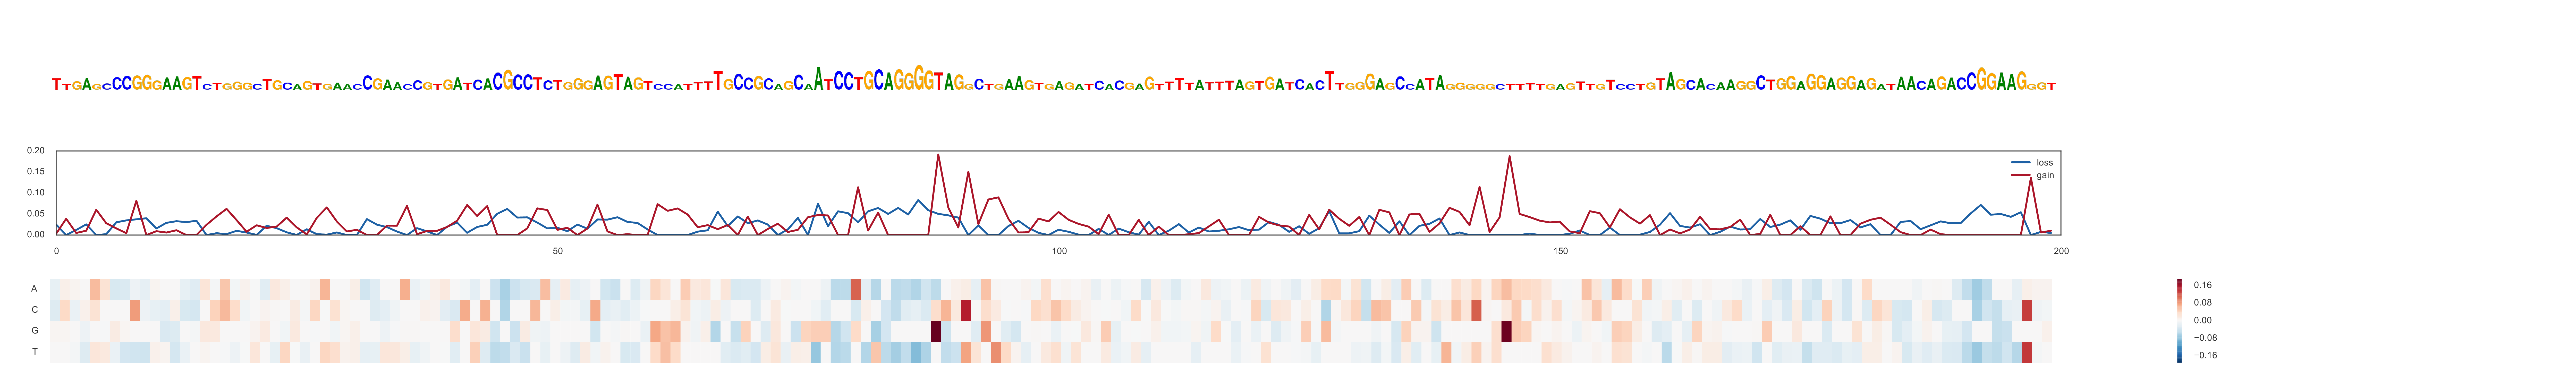

In [2]:
# actual file is satmut/chr17_4904020-4904620\(+\)_c46_heat.pdf

from IPython.display import Image
Image(filename='satmut_eg/chr17_4904020-4904620(+)_c46_heat.png')

If you have a particular sequence of interest, you can also provide *basset_sat.py* with a FASTA file in place of the HDF5 test set.

To demonstrate, I chose a [fascinating boundary domain, separating rostral from caudal gene expression programs in the HOXA locus](http://www.sciencemag.org/content/347/6225/1017.full). The exact region that I grabbed is chr7:27183235-27183835.

By specifying -1 to -t, we'll print heat maps for all cells.

In [13]:
cmd = 'basset_sat.py -t -1 -n 200 -o satmut_hox %s satmut_eg/hoxa_boundary.fa' % model_file
subprocess.call(cmd, shell=True)

0

As mentioned in the paper, the CTCF motif here does not match the consensus; a C->T mutation would cause it to match far better. Accordingly, Basset does not predict high accessibility in any cell type, but does highlight the motif and a GC-rich region to it's left.

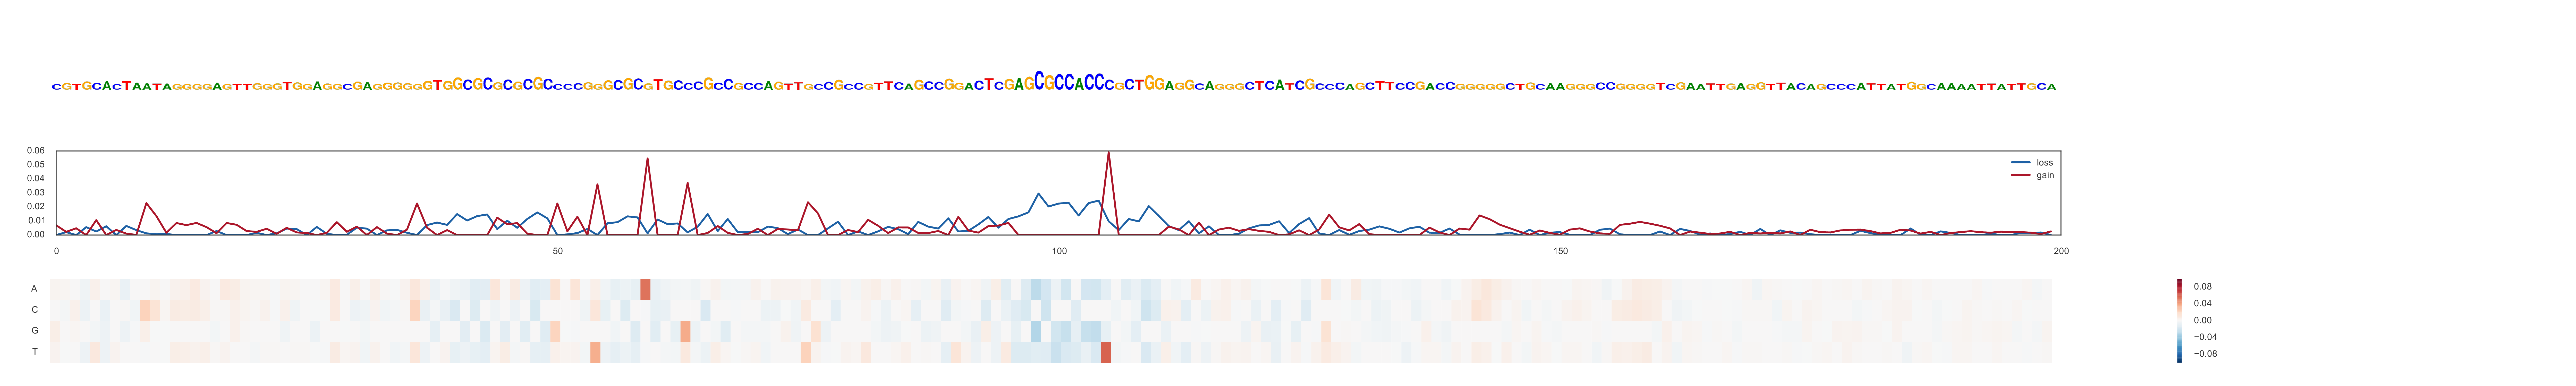

In [3]:
# actual file is satmut_hox/chr7_27183235-27183835_c127_heat.pdf

Image(filename='satmut_eg/chr7_27183235-27183835_c127_heat.png')